In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pkl
import seaborn as sns
import time

In [2]:
infile = open('..//3_k-means_clustering//apartment_data_frame_clustered_500','rb')
frame = pkl.load(infile)
infile.close()

In [3]:
frame

,city,district,voivodeship,localization_y,localization_x,market,area,rooms,floor,floors,build_yr,price,url,price_of_sqm,cluster
0,Warszawa,Wola,mazowieckie,52.245982,20.985385,wtorny,36.00,2,parter,3,1956.0,496000.0,https://gratka.pl/nieruchomosci/mieszkanie-war...,13777.777778,490
1,Kraków,Swoszowice,małopolskie,49.991389,19.946389,wtorny,78.32,3,3,3,2014.0,538000.0,https://gratka.pl/nieruchomosci/mieszkanie-kra...,6869.254341,394
2,Łódź,Śródmieście,łódzkie,51.772914,19.458331,wtorny,60.27,2,2,3,1910.0,270000.0,https://gratka.pl/nieruchomosci/mieszkanie-lod...,4479.840717,152
3,Warszawa,Stara Ochota,mazowieckie,52.218900,20.978800,wtorny,122.00,4,6,7,2020.0,1955000.0,https://gratka.pl/nieruchomosci/mieszkanie-war...,16024.590164,215
4,Kraków,Mistrzejowice,małopolskie,50.096196,20.009887,wtorny,48.07,3,3,4,1978.0,384000.0,https://gratka.pl/nieruchomosci/mieszkanie-kra...,7988.350322,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54462,Warszawa,Wola,mazowieckie,52.237222,20.960556,pierwotny,109.00,4,12,13,2020.0,1460000.0,https://gratka.pl/nieruchomosci/nowe-mieszkani...,13394.495413,159
54463,Warszawa,Wola,mazowieckie,52.237222,20.960556,wtorny,82.60,4,4,5,2020.0,885000.0,https://gratka.pl/nieruchomosci/4-pokojowe-got...,10714.285714,159
54464,Poznań,Grunwald,wielkopolskie,52.392626,16.846137,wtorny,68.25,3,parter,4,2009.0,540000.0,https://gratka.pl/nieruchomosci/mieszkanie-poz...,7912.087912,197
54465,Kraków,Os. Prądnik Czerwony,małopolskie,50.088513,19.958912,wtorny,45.00,2,2,10,2019.0,610000.0,https://gratka.pl/nieruchomosci/mieszkanie-kra...,13555.555556,468


## data preparation

In [4]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54467 entries, 0 to 54466
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            54467 non-null  object 
 1   district        54467 non-null  object 
 2   voivodeship     46557 non-null  object 
 3   localization_y  54467 non-null  float64
 4   localization_x  54467 non-null  float64
 5   market          54467 non-null  object 
 6   area            54467 non-null  float64
 7   rooms           54467 non-null  object 
 8   floor           54467 non-null  object 
 9   floors          54467 non-null  object 
 10  build_yr        54467 non-null  float64
 11  price           54467 non-null  float64
 12  url             54467 non-null  object 
 13  price_of_sqm    54467 non-null  float64
 14  cluster         54467 non-null  int32  
dtypes: float64(6), int32(1), object(8)
memory usage: 6.0+ MB


In [5]:
frame = frame.drop(['city','district','voivodeship','localization_y','localization_x','price','url'],axis=1)

In [6]:
frame.cluster = frame.cluster.apply(str)

In [7]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54467 entries, 0 to 54466
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   market        54467 non-null  object 
 1   area          54467 non-null  float64
 2   rooms         54467 non-null  object 
 3   floor         54467 non-null  object 
 4   floors        54467 non-null  object 
 5   build_yr      54467 non-null  float64
 6   price_of_sqm  54467 non-null  float64
 7   cluster       54467 non-null  object 
dtypes: float64(3), object(5)
memory usage: 3.3+ MB


## creating dummy variables

In [8]:
dummies = pd.get_dummies(frame[['market','rooms','floor','floors','cluster']],drop_first=True)
frame = frame.drop(['market','rooms','floor','floors','cluster'],axis=1)
frame = pd.concat([frame,dummies],axis=1)

In [9]:
frame

,area,build_yr,price_of_sqm,market_wtorny,rooms_2,rooms_3,rooms_4,rooms_5,rooms_6,rooms_7,...,cluster_90,cluster_91,cluster_92,cluster_93,cluster_94,cluster_95,cluster_96,cluster_97,cluster_98,cluster_99
0,36.00,1956.0,13777.777778,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,78.32,2014.0,6869.254341,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60.27,1910.0,4479.840717,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,122.00,2020.0,16024.590164,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,48.07,1978.0,7988.350322,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54462,109.00,2020.0,13394.495413,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54463,82.60,2020.0,10714.285714,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54464,68.25,2009.0,7912.087912,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54465,45.00,2019.0,13555.555556,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## train test split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = frame.drop('price_of_sqm',axis=1).values
y = frame.price_of_sqm.values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

## random forest regressor and grid search

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [14]:
parameters = [{'n_estimators':[10,30,50,100,200]}]

In [15]:
grid_search = GridSearchCV(estimator = RandomForestRegressor(),
                           param_grid = parameters,
                           cv = 3,
#                            n_jobs = -1,
                          )

In [16]:
start = time.time()

grid_search = grid_search.fit(X_train, y_train)

stop = time.time()
print('\n',(stop-start)//60,'min.')


 73.0 min.


In [17]:
grid_search.best_score_

0.7749773493968167

In [18]:
grid_search.best_params_

{'n_estimators': 200}

In [19]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,26.597932,0.775680,0.089719,0.005817,10,{'n_estimators': 10},0.767103,0.745307,0.758292,0.756901,0.008952,5
1,82.238996,0.690531,0.238662,0.011413,30,{'n_estimators': 30},0.781518,0.756617,0.768336,0.768824,0.010172,4
2,143.912480,3.366931,0.382754,0.002752,50,{'n_estimators': 50},0.782557,0.760968,0.772149,0.771891,0.008816,3
3,291.765858,0.992086,0.745976,0.010556,100,{'n_estimators': 100},0.783549,0.761087,0.772291,0.772309,0.009170,2
4,577.918580,53.838267,1.498439,0.300416,200,{'n_estimators': 200},0.787049,0.763240,0.774643,0.774977,0.009723,1


In [20]:
start = time.time()

model = RandomForestRegressor(n_estimators = 30, random_state = 0)
model.fit(X_train, y_train)

stop = time.time()
print('\n',(stop-start)//60,'min.')


 2.0 min.


## model evaluation

In [21]:
from sklearn.metrics import r2_score

In [22]:
predictions = model.predict(X_test)

In [23]:
r2_score(y_test,predictions)

0.7910909320603418

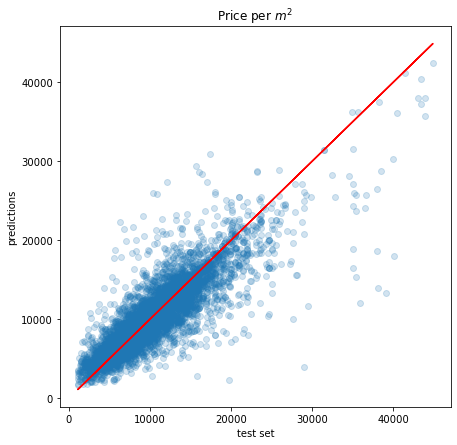

In [24]:
plt.figure(figsize=(7,7))
# plt.xlim(0,500)
# plt.ylim(0,500)

# Our predictions
plt.scatter(x=y_test,y=predictions,edgecolor=None,alpha=0.2)
plt.xlabel('test set')
plt.ylabel('predictions')
plt.title('Price per $m^{2}$')

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [29]:
errors = y_test - predictions

Text(0.5, 1.0, 'Error distribution')

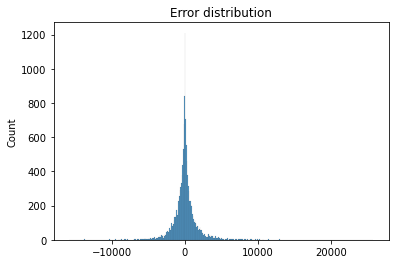

In [30]:
# plt.xlim(-200000,200000)

sns.histplot(errors)
plt.title('Error distribution')

In [25]:
predictions

array([4738.23979902, 4276.87280372, 9065.1984544 , ..., 9276.28270008,
       7183.60853219, 4031.50031797])

In [26]:
predictions[:20]/y_test[:20]

array([1.01414957, 1.21463188, 0.93576242, 1.01017622, 1.02879775,
       0.99318085, 0.9987125 , 0.90764236, 0.98019231, 1.08095387,
       1.14738771, 1.03151891, 0.99620633, 1.06018683, 0.27725383,
       0.96553204, 1.27201886, 0.90897742, 1.32861874, 0.8953134 ])

## k-Fold Cross Validation

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
start = time.time()

accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

stop = time.time()
print('\n',(stop-start)//60,'min.')


 20.0 min.


In [33]:
accuracies.mean()

0.7872841449333146

In [34]:
accuracies.std()

0.014342070760309238

In [35]:
accuracies

array([0.80562827, 0.78554612, 0.80886739, 0.78084887, 0.76453769,
       0.76707559, 0.79898244, 0.77724062, 0.79131611, 0.79279835])

## saving data

In [36]:
import joblib
joblib.dump(model, 'random_forest_model_a')

['random_forest_model_a']